In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from collections import defaultdict

In [3]:
df = pd.read_csv("data/train_sections_data.csv", encoding="cp1252")

In [4]:
df.columns

Index(['Text', 'IsBold', 'IsItalic', 'IsUnderlined', 'Left', 'Right', 'Top',
       'Bottom', 'FontType', 'Label', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [5]:
df["Label"].value_counts() / df.shape[0]

0    0.740063
1    0.259937
Name: Label, dtype: float64

# The dataset is largly imbalanced  - 74% negative class

In [6]:
df[df["Label"] == 1].head(10)["Text"].tolist()

['NOTES TO THE ACCOUNTS FOR THE 52 WEEK PERIOD ENDED 1 FEBRUARY 2016',
 'DERIVATIVE INSTRUMENTS',
 "The occurrence of a catastrophic disaster or other similar events could cause damage to our own or our manufacturers' facilities and equipment, which could require us to cease or curtail operations.",
 '15',
 'Item 4.',
 'Allowance for Doubtful Accounts',
 'ITEM 4.',
 'Cash Flows',
 'Authorization Procedures in the European Union',
 'Board Comment:']

# Let's look at text length

In [7]:
df["len"] = df["Text"].apply(lambda x: len(x))

In [8]:
df[df["Label"] == 0]["len"].describe()

count    10520.000000
mean       379.221958
std        401.580526
min          1.000000
25%         83.000000
50%        250.000000
75%        550.000000
max       3641.000000
Name: len, dtype: float64

In [9]:
df[df["Label"] == 1]["len"].describe()

count    3695.000000
mean       38.213261
std        58.607252
min         1.000000
25%        10.000000
50%        21.000000
75%        39.000000
max       697.000000
Name: len, dtype: float64

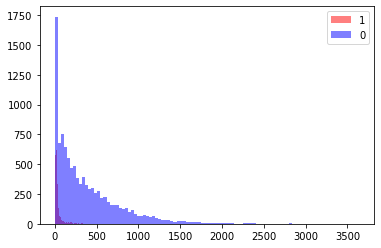

In [12]:
plt.hist(df[df["Label"] == 1]["len"], color="red", bins=100, label="1", alpha=0.5);
plt.hist(df[df["Label"] == 0]["len"], color="blue", bins=100, label="0", alpha=0.5);
plt.legend(loc='upper right');

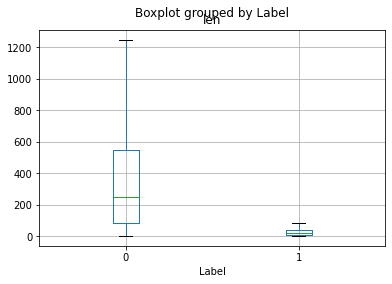

In [13]:
df.boxplot(by="Label", column="len", showfliers=False);

# Looks like texts in negative class are usually longer

# Let's look at long titles

In [10]:
df[(df["Label"] == 1) & (df["len"] > 50)].head(10)["Text"].tolist()

['NOTES TO THE ACCOUNTS FOR THE 52 WEEK PERIOD ENDED 1 FEBRUARY 2016',
 "The occurrence of a catastrophic disaster or other similar events could cause damage to our own or our manufacturers' facilities and equipment, which could require us to cease or curtail operations.",
 "Independent Auditors' Report to the Directors of Tungsten Bank plc",
 "COUNTRY-BY-COUNTRY REPORTING AUDITORS' REPORT ON COUNTRY-BY-COUNTRY REPORTING",
 "The Company's Executive Chairman has interests that may conflict with the interests of the Company.",
 'Failure to comply with Section 404 of the Sarbanes-Oxley Act of 2002 could negatively impact our business, the price of our common stock and market confidence in our reported financial information.',
 'BANK OF AMERICA MERRILL LYNCH INTERNATIONAL LIMITED',
 'Financial Assets and Financial Liabilities by Category',
 'QUANTITATIVE AND QUALITATIVE DISCLOSURES ABOUT MARKET RISK',
 'Public perception of mifepristone may limit our ability to sell Korlym.']

# Let's look at short non-titles

In [11]:
df[(df["Label"] == 0) & (df["len"] < 39)].head(15)["Text"].tolist()

['-6',
 '•',
 '•',
 'NM - Not meaningful',
 '_________________________',
 '•',
 '•',
 '-2',
 '•',
 'strategic and operational planning;',
 '•',
 'Sources of Liquidity',
 'Cash',
 '8',
 '•']

# Let's look at IsBold

In [14]:
def get_counts(feat: str):
    for label in [0, 1]:
        print(f"Label {label}")
        print(df[df["Label"] == label][feat].value_counts() / df[df["Label"] == label].shape[0])

In [15]:
get_counts("IsBold")

Label 0
False    0.978707
True     0.021293
Name: IsBold, dtype: float64
Label 1
True     0.850338
False    0.149662
Name: IsBold, dtype: float64


# Most of the titles are bold

In [16]:
get_counts("IsItalic")

Label 0
False    0.979373
True     0.020627
Name: IsItalic, dtype: float64
Label 1
False    0.772936
True     0.227064
Name: IsItalic, dtype: float64


# Italic is not that common in either of the classes

In [17]:
get_counts("IsUnderlined")

Label 0
False    0.998954
True     0.001046
Name: IsUnderlined, dtype: float64
Label 1
False    0.970501
True     0.029499
Name: IsUnderlined, dtype: float64


# Undelined is also not that common

In [18]:
df["FontType"].value_counts()

New Times Roman    14215
Name: FontType, dtype: int64

# Only one font type

# Let's look at box size

In [19]:
df["width"] = df["Right"] - df["Left"]
df["height"] = df["Bottom"] - df["Top"]

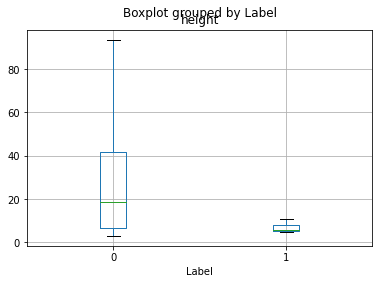

In [20]:
df.boxplot(by="Label", column="height", showfliers=False);

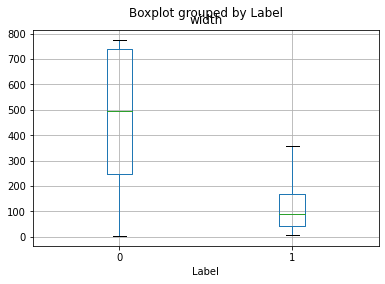

In [21]:
df.boxplot(by="Label", column="width", showfliers=False);

In [22]:
df["area"] = df["height"] * df["width"]

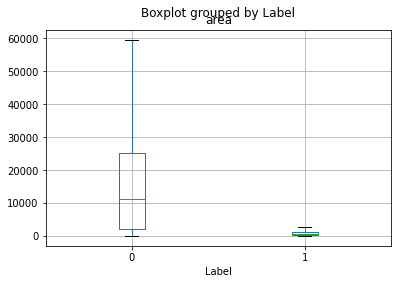

In [23]:
df.boxplot(by="Label", column="area", showfliers=False);

# Box area should be a good feature

# The ratio of area and number of letters

In [29]:
df["area_len_ratio"] = df["area"] / df["len"]

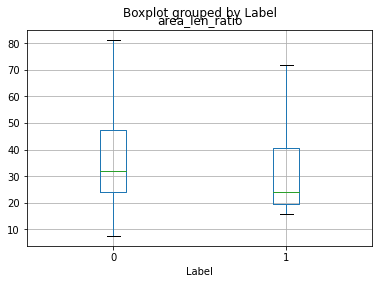

In [30]:
df.boxplot(by="Label", column="area_len_ratio", showfliers=False);

In [24]:
df["is_upper"] = df["Text"].apply(lambda x: x.isupper())

In [25]:
get_counts("is_upper")

Label 0
False    0.998574
True     0.001426
Name: is_upper, dtype: float64
Label 1
False    0.87659
True     0.12341
Name: is_upper, dtype: float64


In [26]:
chars_cnt = defaultdict(int)
for doc in df["Text"].tolist():
    for c in doc:
        chars_cnt[c] += 1

cnt_chars = sorted([(cnt, c) for c, cnt in chars_cnt.items()], reverse=True)
print(cnt_chars)
print(cnt_chars[90:])
print(len(chars_cnt))

[(618268, ' '), (398170, 'e'), (277044, 't'), (258938, 'a'), (252250, 'n'), (251830, 'i'), (230524, 'o'), (219628, 'r'), (208787, 's'), (126068, 'c'), (121830, 'l'), (120856, 'd'), (94471, 'u'), (93521, 'h'), (82398, 'm'), (75515, 'p'), (71837, 'f'), (53208, 'g'), (44378, ','), (43048, 'y'), (38680, 'b'), (36745, 'v'), (31119, '.'), (29816, '1'), (27442, 'w'), (25036, '0'), (23686, '2'), (14060, '3'), (12844, '5'), (12353, '6'), (12346, 'C'), (11901, 'A'), (11462, '4'), (11286, 'x'), (11233, 'k'), (10786, 'T'), (10372, '-'), (10185, 'S'), (8864, '7'), (8235, '$'), (8138, '9'), (8073, '8'), (7962, 'I'), (7836, ')'), (7816, '('), (6863, 'D'), (6353, 'q'), (5442, 'F'), (5334, 'E'), (5297, 'R'), (5025, 'P'), (4921, 'O'), (4868, 'B'), (4181, "'"), (4125, 'N'), (3959, 'M'), (3442, 'L'), (3030, 'U'), (2918, '"'), (2787, 'z'), (2554, '%'), (2394, 'j'), (2394, 'W'), (1928, 'G'), (1730, ':'), (1314, 'H'), (1289, ';'), (1102, 'V'), (1077, 'K'), (978, 'J'), (814, '/'), (730, '£'), (665, '•'), (618

In [27]:
df["words"] = df["Text"].apply(lambda x: len(x.split()))

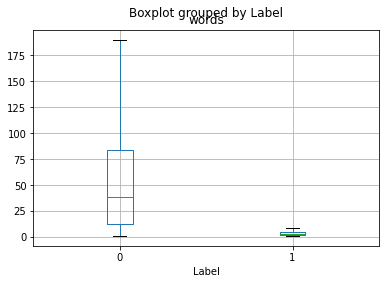

In [28]:
df.boxplot(by="Label", column="words", showfliers=False);